In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'tomato:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F259770%2F544347%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240519%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240519T083753Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8e579c67c34261834ffe12b5fe1a29a2a6fe2f30d2427714964941195dc91ea0257681e240ec7ce7874469aa6e3fd360b3dd9f2355d4ff3a65590f12721f9b8ec171415b12eaecfb8c1a8219340437931c223a963df2a3fb6ce440a0bf067e707b4f59cfaf4821e4bc61b92d6379f18aa10c63308cd7d173e1f3b26c6bc8e6e5eb82f33289e0b700933e28da6271675073e82fa8cd3e8083cb3a4d3886d8cf34b36cf9c74a4a342588142eee0bccb375376270a08b0e183a4ee7e70e599c76b44ca5dcb3e8b93f050f5f3d892b683ee73379f967146abe71166e80e0fa65626c35da91ff7eeff9eb5c2a3cd995c265fd89b6f9fc0dac1f559b9f240fcb5f20cd'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import tensorflow as tf
import pandas as pd
from keras.utils import to_categorical
import random
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, array_to_img, img_to_array
from tensorflow.keras.models import Sequential
from glob import glob

2024-04-24 16:35:15.439972: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-24 16:35:15.440066: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-24 16:35:15.564303: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

In [ ]:
import json
import os
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
%matplotlib inline
import torchvision.transforms as tt
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import torch
import torch.nn as nn
from torchvision.utils import save_image
from tqdm.notebook import tqdm
import torch.nn.functional as F
from IPython.display import Image
import cv2

In [ ]:
path = "/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)"
os.listdir(path)

['valid', 'train']

In [ ]:
train_path = os.path.join(path, "train")
print(os.listdir(train_path))
print("*"*100)
test_path = os.path.join(path, "valid")
print(os.listdir(test_path))

['Tomato___Late_blight', 'Tomato___healthy', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Leaf_Mold', 'Tomato___Spider_mites Two-spotted_spider_mite']
****************************************************************************************************
['Tomato___Late_blight', 'Tomato___healthy', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Leaf_Mold', 'Tomato___Spider_mites Two-spotted_spider_mite']


In [ ]:
folders = glob("/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/*")
folders

['/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight',
 '/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy',
 '/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight',
 '/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot',
 '/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot',
 '/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot',
 '/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus',
 '/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold',
 '/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite']

Text(0.5, 1.0, 'Bacterial Spot')

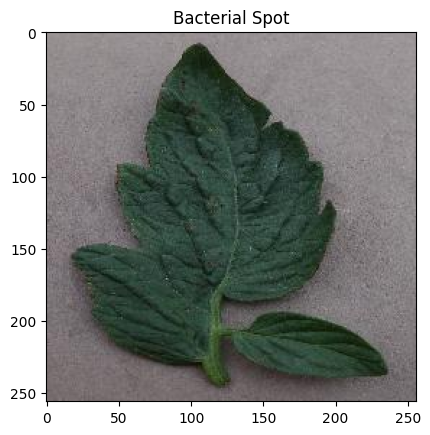

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG"))
plt.title("Bacterial Spot")

In [ ]:
train_dir = "/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/"
val_dir = "/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/valid/"

In [ ]:
class_names = sorted(os.listdir(train_dir))
class_names

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [ ]:
class_dis = [len(os.listdir(train_dir + name)) for name in class_names]
class_dis

[1702, 1920, 1851, 1882, 1745, 1741, 1827, 1961, 1790, 1926]

In [ ]:
class_names1 = sorted(os.listdir(val_dir))
class_names1

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [ ]:
class_dis1 = [len(os.listdir(val_dir + name)) for name in class_names]
class_dis1

[425, 480, 463, 470, 436, 435, 457, 490, 448, 481]

In [ ]:
import plotly.express as px
fig = px.pie(names=class_names, values=class_dis, hole=0.3)
fig.update_layout({"title":{"text":"Distibution of classes", "x":0.50}})
fig.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

In [ ]:
# Load MobileNet model without the top (classification) layer
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Add custom classification layers
x = Flatten()(base_model.output)
predictions = Dense(len(folders), activation='softmax')(x)
model_mobile = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Summary of the model architecture
model_mobile.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,730,634 (14.23 MB)

 Trainable params: 501,770 (1.91 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [ ]:
# Compile the model
model_mobile.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Data Augmentation
train_datagen_mobile = ImageDataGenerator(rescale=1./255)
test_datagen_mobile = ImageDataGenerator(rescale=1./255)

In [ ]:
trainning_set_mobile = train_datagen_mobile.flow_from_directory(train_path,
                                                                 target_size=(224, 224),
                                                                 batch_size=32,
                                                                 class_mode="categorical",
                                                                 shuffle=True)

Found 18345 images belonging to 10 classes.


In [ ]:
testing_set_mobile = test_datagen_mobile.flow_from_directory(test_path,
                                                              target_size=(224, 224),
                                                              batch_size=32,
                                                              class_mode="categorical",
                                                              shuffle=False)

Found 4585 images belonging to 10 classes.


In [ ]:
import tensorflow as tf
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
# Train the model
r_mobile = model_mobile.fit(trainning_set_mobile,
                                      validation_data=testing_set_mobile,
                                      epochs=50,
                                      callbacks=[callback])

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



  1/574 ━━━━━━━━━━━━━━━━━━━━ 1:27:37 9s/step - accuracy: 0.0625 - loss: 4.4412

I0000 00:00:1713976650.498828      87 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


574/574 ━━━━━━━━━━━━━━━━━━━━ 158s 260ms/step - accuracy: 0.7490 - loss: 2.8713 - val_accuracy: 0.9169 - val_loss: 1.0030
Epoch 2/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 48s 82ms/step - accuracy: 0.9493 - loss: 0.5224 - val_accuracy: 0.9091 - val_loss: 1.3425
Epoch 3/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 48s 82ms/step - accuracy: 0.9672 - loss: 0.3460 - val_accuracy: 0.9333 - val_loss: 1.0118
Epoch 4/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 47s 81ms/step - accuracy: 0.9783 - loss: 0.2290 - val_accuracy: 0.8776 - val_loss: 2.3953
Epoch 5/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 48s 82ms/step - accuracy: 0.9790 - loss: 0.2288 - val_accuracy: 0.9136 - val_loss: 2.0648
Epoch 6/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 46s 80ms/step - accuracy: 0.9813 - loss: 0.2701 - val_accuracy: 0.9272 - val_loss: 1.9041
Epoch 7/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 46s 79ms/step - accuracy: 0.9837 - loss: 0.2356 - val_accuracy: 0.9234 - val_loss: 2.3081
Epoch 8/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 45s 78ms/step - accuracy: 0.9824 - loss: 0.3234 - val_accur

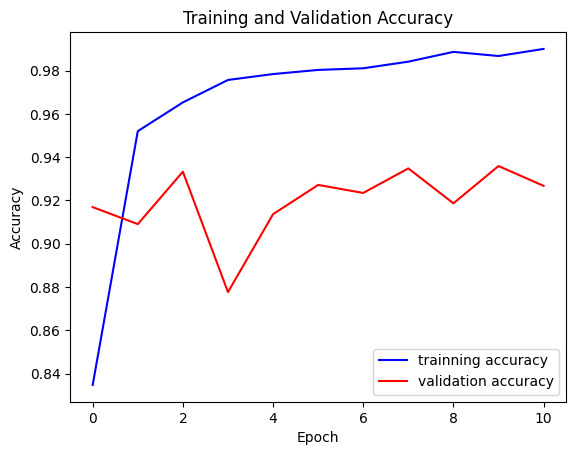

In [ ]:
import matplotlib.pyplot as plt
accuracy = r_mobile.history['accuracy']
val_accuracy = r_mobile.history['val_accuracy']
loss = r_mobile.history['loss']
val_loss = r_mobile.history['val_loss']
epochs = range(len(accuracy))
plt.title("Training and Validation Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

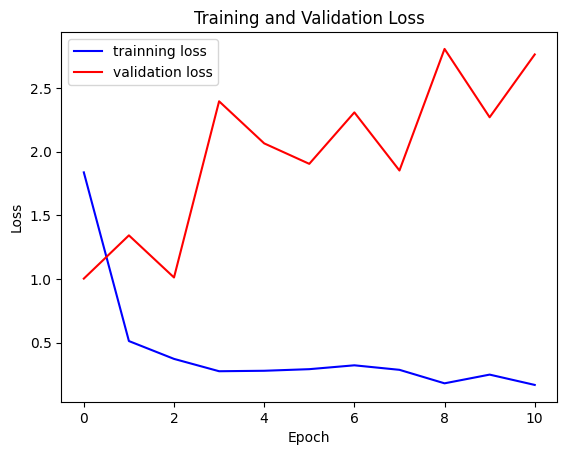

In [ ]:
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [ ]:
model_mobile.save("mobnet1.keras")

In [ ]:
import cv2
import tensorflow as tf
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    new_array = cv2.resize(img_array, (224, 224))
    return new_array.reshape(-1, 224, 224, 3)

In [ ]:
model = tf.keras.models.load_model("mobnet1.keras")

In [ ]:
class_dict = trainning_set_mobile.class_indices
class_dict

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [ ]:
def prediction_cls(prediction):
    for key, clss in class_dict.items():
        if np.argmax(prediction) == clss:
            details = details_dict[key]
            return key, details

In [ ]:
import numpy as np
details_dict = {
    'Tomato___Bacterial_spot': "The tomato chosen has Bacterial spot (Caused by Xanthomonas spp.). \nManagement: Use fertilizers low in nitrogen, as excessive nitrogen can encourage lush growth that is more susceptible to bacterial infections. Focus on potassium-rich fertilizers to help strengthen cell walls and improve disease resistance.",
    'Tomato___Early_blight':  "The tomato chosen has Early blight (Caused by the fungus Alternaria solani). \nManagement: Avoid excessive nitrogen and focus on balanced fertilization to support overall plant health.",
    'Tomato___Late_blight':"The tomato chosen has Late blight (Caused by the fungus Phytophthora infestans). \nManagement: Maintain balanced nutrition to support plant health and avoid excessive nitrogen, which can promote lush growth more susceptible to fungal infections.",
    'Tomato___Leaf_mould':"The tomato chosen has Leaf mold (Caused by the fungus Fulvia fulva). \nManagement: Balanced fertilization can help maintain plant vigor and resilience. Adequate potassium levels can improve disease resistance.",
    'Tomato___Septoria_leaf_spot' :"The tomato chosen has Septoria leaf spot (Caused by the fungus Septoria lycopersici). \nManagement: Balanced fertilization with adequate potassium levels can help improve disease resistance. Avoid excessive nitrogen, which can promote lush foliage more susceptible to fungal infections.",
    'Tomato___Spider_mites Two-spotted_spider_mite':"The tomato chosen has Two-spotted spider mite (Tetranychus urticae). \nManagement: While not a disease, maintaining proper fertilization can help keep plants healthy and better able to withstand pest infestations. Avoid over-fertilization, as this can attract mites.",
    'Tomato___Target_spot':"The tomato chosen has Target spot (Caused by the fungus Corynespora cassiicola). \nManagement: Maintain balanced nutrition to support plant health. Avoid excessive nitrogen, as it can promote lush foliage that is more susceptible to fungal diseases.",
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus': "The tomato chosen has Yellow leaf curl virus (Caused by various Begomovirus species). \nManagement: Ensure the plant's nutritional needs are met with balanced fertilization to support its overall health and vigor.",
    'Tomato___Tomato_mosaic_virus': "The tomato chosen has Tomato mosaic virus (Caused by virus). \nManagement: Use a balanced fertilizer with moderate levels of nitrogen, phosphorus, and potassium to support overall plant health and vigor.",
    'Tomato___healthy':"The image of the tomato leaf chosen is healthy."

}

In [ ]:
prediction = model.predict([prepare("/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/valid/Tomato___healthy/0a334ae6-bea3-4453-b200-85e082794d56___GH_HL Leaf 310.1_flipTB.JPG")])[0]
predicted_class, details = prediction_cls(prediction)
print("Predicted class:", predicted_class)
print("Details:", details)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class: Tomato___Late_blight
Details: The tomato chosen has Late blight (Caused by the fungus Phytophthora infestans). 
Management: Maintain balanced nutrition to support plant health and avoid excessive nitrogen, which can promote lush growth more susceptible to fungal infections.


In [ ]:
prediction = model.predict([prepare("../input/tomato/New Plant Diseases Dataset(Augmented)/valid/Tomato___Late_blight/005e3b43-9050-47da-9498-f9ecdcc703b3___RS_Late.B 5104.JPG")])
predicted_class, details = prediction_cls(prediction)
print("Predicted class:", predicted_class)
print("Details:", details)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Tomato___Late_blight
Details: The tomato chosen has Late blight (Caused by the fungus Phytophthora infestans). 
Management: Maintain balanced nutrition to support plant health and avoid excessive nitrogen, which can promote lush growth more susceptible to fungal infections.


In [ ]:
prediction = model.predict([prepare("../input/tomato/New Plant Diseases Dataset(Augmented)/valid/Tomato___Early_blight/004cbe60-8ff9-4965-92df-e86694d5e9ba___RS_Erly.B 8253.JPG")])
predicted_class, details = prediction_cls(prediction)
print("Predicted class:", predicted_class)
print("Details:", details)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Tomato___Late_blight
Details: The tomato chosen has Late blight (Caused by the fungus Phytophthora infestans). 
Management: Maintain balanced nutrition to support plant health and avoid excessive nitrogen, which can promote lush growth more susceptible to fungal infections.


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
# Predict the classes of the test set
y_pred = model_mobile.predict(testing_set_mobile)
y_pred_classes = np.argmax(y_pred, axis=1)

144/144 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step


In [ ]:
precision = precision_score(testing_set_mobile.classes, y_pred_classes, average='weighted')
recall = recall_score(testing_set_mobile.classes, y_pred_classes, average='weighted')
f1 = f1_score(testing_set_mobile.classes, y_pred_classes, average='weighted')
confusion = confusion_matrix(testing_set_mobile.classes, y_pred_classes)

In [ ]:
# Print the results
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 score: {:.2f}%".format(f1 * 100))
print("Confusion matrix:")
print(confusion)

Precision: 93.05%
Recall: 92.67%
F1 score: 92.56%
Confusion matrix:
[[421   1   0   1   0   0   1   0   1   0]
 [  8 405  39   5   0   5  15   0   3   0]
 [  3   5 442   5   0   3   1   1   2   1]
 [  1   4   3 442   1  10   1   0   8   0]
 [ 28  20   9  17 320   4  19   0  19   0]
 [  0   1   2   0   0 411  15   1   5   0]
 [  4   3   3   0   0  12 429   0   5   1]
 [  0   0   0   0   0   2   0 486   2   0]
 [  0   0   0   0   0   0   0   0 448   0]
 [  4   1   2   0   0   8  17   0   4 445]]


In [ ]:
from tabulate import tabulate

# Calculate precision, recall, and F1 score for each class
class_precision = precision_score(testing_set_mobile.classes, y_pred_classes, average=None)
class_recall = recall_score(testing_set_mobile.classes, y_pred_classes, average=None)
class_f1 = f1_score(testing_set_mobile.classes, y_pred_classes, average=None)

# Create a list of lists to store the table data
table_data = [['Class', 'Precision', 'Recall', 'F1 score']]

# Add the class-wise metrics to the table data
for i in range(len(class_names)):
    table_data.append([class_names[i], f"{class_precision[i] * 100:.2f}", f"{class_recall[i] * 100:.2f}", f"{class_f1[i] * 100:.2f}"])

# Print the table
print("Class-wise Precision, Recall, and F1 score:")
print(tabulate(table_data, tablefmt='grid'))

Class-wise Precision, Recall, and F1 score:
+-----------------------------------------------+-----------+--------+----------+
| Class                                         | Precision | Recall | F1 score |
+-----------------------------------------------+-----------+--------+----------+
| Tomato___Bacterial_spot                       | 89.77     | 99.06  | 94.18    |
+-----------------------------------------------+-----------+--------+----------+
| Tomato___Early_blight                         | 92.05     | 84.38  | 88.04    |
+-----------------------------------------------+-----------+--------+----------+
| Tomato___Late_blight                          | 88.40     | 95.46  | 91.80    |
+-----------------------------------------------+-----------+--------+----------+
| Tomato___Leaf_Mold                            | 94.04     | 94.04  | 94.04    |
+-----------------------------------------------+-----------+--------+----------+
| Tomato___Septoria_leaf_spot                   | 99.6

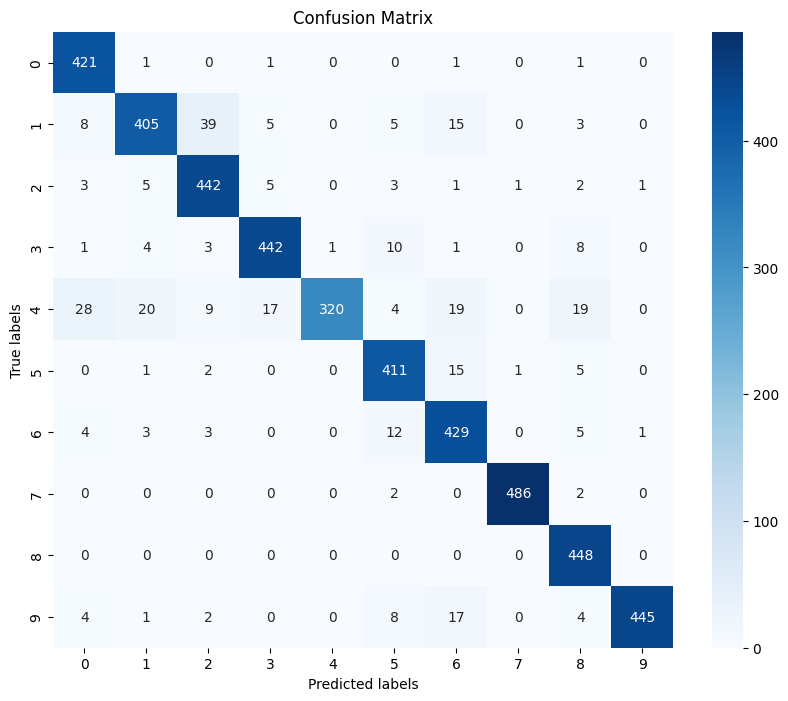

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
confusion = confusion_matrix(testing_set_mobile.classes, y_pred_classes)

# Plot the confusion matrix with colors
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(testing_set_mobile.classes, y_pred_classes, target_names=class_names))

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.90      0.99      0.94       425
                        Tomato___Early_blight       0.92      0.84      0.88       480
                         Tomato___Late_blight       0.88      0.95      0.92       463
                           Tomato___Leaf_Mold       0.94      0.94      0.94       470
                  Tomato___Septoria_leaf_spot       1.00      0.73      0.85       436
Tomato___Spider_mites Two-spotted_spider_mite       0.90      0.94      0.92       435
                         Tomato___Target_Spot       0.86      0.94      0.90       457
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       1.00      0.99      0.99       490
                 Tomato___Tomato_mosaic_virus       0.90      1.00      0.95       448
                             Tomato___healthy       1.00      0.93      0.96       481

                                     accu

In [ ]:
# Save the model to a HDF5 file
model_mobile.save('model_mobnet1.h5')